In [ ]:
!pip install auto_diff_pkg

In [1]:
from auto_diff_pkg.ReverseAutoDiff import ReverseADNode, sqrt, sin, cos, exp, log, tan, arcsin, arccos, arctan, sinh, cosh, tanh, jacobian

In [2]:
#Setting up our functions 
values = []
values.append([1, 2, 4])
values.append([1, 2, 4, 20, 6, 4.5, 12, 3, 0.8, 10])
def f1(x0, x1, x2):
    return (x0 + x1 + x2)
def f2(x0, x1, x2):
    return (1 * x0 + 2 * x1 + 3 * x2)
def f3(x0, x1, x2):
    return (1 * x0 * 2 * x1 * 3 * x2)
def f4(x0, x1, x2):
    return (x0 ** 2 + x1 ** 3 + x2 ** 4)
def f5(x0, x1, x2):
    return (sin(x0) + cos(x1) + tan(x2))
def f6(x0, x1, x2):
    return (x0 - x1 * x2)
def f7(x0, x1, x2):
    return (1 * x0 - 2 * x1 + x2 ** 2)
def f8(x0, x1, x2):
    return (2 * x0 * x1 + x2/3)
def f9(x0, x1, x2):
    return (x0 ** 2 + 3*x1 + sqrt(x2))
def f10(x0, x1, x2):
    return (x0 ** 2 + 3*x1 + sqrt(x2))
def f11(x0, x1, x2, x3, x4, x5, x6, x7, x8, x9):
    return (sin(x0) + cos(x1**2) + 3*x2 + x3 ** 2 + 5*x4 + x5*x6 + x7/x8 - x9**2)
def f12(x0, x1, x2, x3, x4, x5, x6, x7, x8, x9):
    return (2 * x0 * x1 + x2/3 + 1 * x3 + 2 * x4 + 3 * x5 + x6*x7 - x8 + exp(x9))
def f13(x0, x1, x2, x3, x4, x5, x6, x7, x8, x9):
    return (sin(x0) + cos(x1**2) + 3*x2 + 2 * x3 * x4 + x5/3 + x6 - x7 * x8 + 4*x9)
functions_of_3_vars = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]
functions_of_10_vars = [f11, f12, f13]

In [3]:
import os
import psutil
import time

RD_start_times = []
RD_end_times = []
RD_start_mem = []
RD_end_mem = []

process = psutil.Process(os.getpid())

In [4]:
RD_start_times.append(time.perf_counter())
RD_start_mem.append(process.memory_info()[0])
res1 = jacobian(values[0], functions_of_3_vars)
RD_end_times.append(time.perf_counter())
RD_end_mem.append(process.memory_info()[0])

In [5]:
RD_start_times.append(time.perf_counter())
RD_start_mem.append(process.memory_info()[0])
res2 = jacobian(values[1], functions_of_10_vars)
RD_end_times.append(time.perf_counter())
RD_end_mem.append(process.memory_info()[0])

In [6]:
RD_times = (RD_end_times[0]-RD_start_times[0], RD_end_times[1]-RD_start_times[1])
RD_mem = (RD_end_mem[0]-RD_start_mem[0], RD_end_mem[1]-RD_start_mem[1])

In [7]:
print(RD_times)
print(RD_mem)

(0.0006100230000001261, 0.0005436999999997028)
(45056, 4096)


In [8]:
from auto_diff_pkg.AutoDiff import AutoDiff, sqrt, sin, cos, exp, log, tan, arcsin, arccos, arctan, sinh, cosh, tanh, jacobian

In [9]:
AD_start_times = []
AD_end_times = []
AD_start_mem = []
AD_end_mem = []

process = psutil.Process(os.getpid())

In [10]:
AD_start_times.append(time.perf_counter())
AD_start_mem.append(process.memory_info()[0])
res1 = jacobian(values[0], functions_of_3_vars)
AD_end_times.append(time.perf_counter())
AD_end_mem.append(process.memory_info()[0])

In [11]:
AD_start_times.append(time.perf_counter())
AD_start_mem.append(process.memory_info()[0])
res2 = jacobian(values[1], functions_of_10_vars)
AD_end_times.append(time.perf_counter())
AD_end_mem.append(process.memory_info()[0])

In [12]:
AD_times = (AD_end_times[0]-AD_start_times[0], AD_end_times[1]-AD_start_times[1])
AD_mem = (AD_end_mem[0]-AD_start_mem[0], AD_end_mem[1]-AD_start_mem[1])

In [13]:

print(AD_times, RD_times)
print(AD_mem, RD_mem)

(0.0006625150000001412, 0.000397312999998789) (0.0006100230000001261, 0.0005436999999997028)
(0, 0) (45056, 4096)


Text(0.5, 1.0, 'Run time comparison')

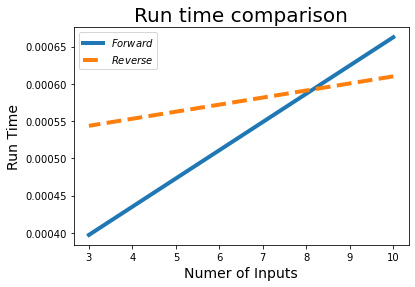

In [22]:
import matplotlib.pyplot as plt

x = [10, 3]
y_ad_times = AD_times
y_rd_times = RD_times

plt.plot(x, y_ad_times, lw=4, ls='-', label=r'$Forward$')  # linewidth = 4, linestyle = solid, raw string label
plt.plot(x, y_rd_times, lw=4, ls='--', label=r'$Reverse$')
plt.legend() # show legend
plt.xlabel('Numer of Inputs', fontsize=14) # label x axis
plt.ylabel('Run Time', fontsize=14) # label y axis
plt.title('Run time comparison', fontsize=20)